In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [4]:
df = pd.read_csv(r'C:\Users\Sanke\Downloads\Diamond Price Prediction.csv')
display(df.head(3))

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [5]:
df.shape

(53940, 11)

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

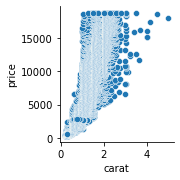

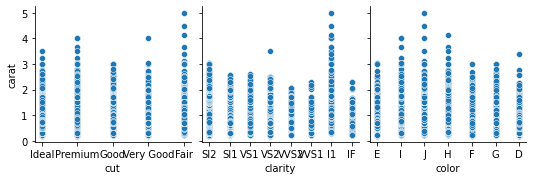

In [11]:
sns.pairplot(df, x_vars=['carat'], y_vars = ['price'])
sns.pairplot(df, x_vars=['cut', 'clarity', 'color'], y_vars = ['carat'])
plt.show()

(2.0, 10.0)

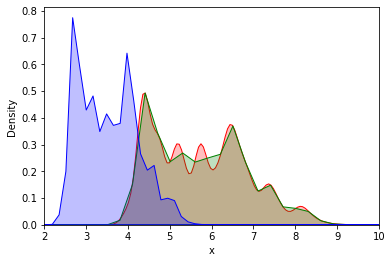

In [83]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

In [84]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


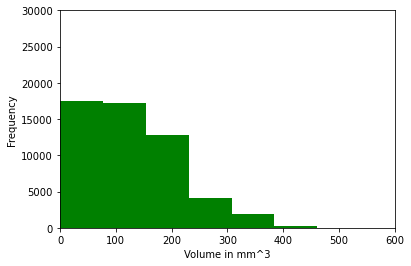

In [85]:
plt.hist( x=df['volume'] , bins=50 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.xlim(0,600)
plt.ylim(0,30000)
plt.show()

In [86]:
def convert_catg(df):
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    object_cols=list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind=[]
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))
    for i in object_cols_ind:
        df.iloc[:,i]=le.fit_transform(df.iloc[:,i])

In [87]:
convert_catg(df)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885


In [88]:
X=df.drop(['price','x','y','z'],axis=1)
Y=df[['price']]

In [89]:
df_le = X.copy()
df_le['price'] = Y['price'].values
df_le.corr()

,carat,cut,color,clarity,depth,table,volume,price
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.976308,0.921591
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.021440,0.039860
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.284267,0.172511
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.206632,-0.071535
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,0.009157,-0.010647
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.167400,0.127134
volume,0.976308,0.021440,0.284267,-0.206632,0.009157,0.167400,1.000000,0.902385
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,0.902385,1.000000


In [90]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0:3]

array([[-1.19816781, -0.53809897, -0.93716275, -0.4842643 , -0.17409151,
        -1.09967199, -1.17129422],
       [-1.24036129,  0.43494935, -0.93716275, -1.06411727, -1.36073849,
         1.58552871, -1.21853297],
       [-1.19816781, -1.51114729, -0.93716275,  0.09558866, -3.38501862,
         3.37566251, -1.17289363]])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [92]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [93]:
Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
prediction = Lreg.predict(X_test)
rmse_Lreg = np.sqrt(sk.metrics.mean_squared_error(y_test, prediction))
print('RMSE value is = {}'.format(rmse_Lreg))
r2_Lreg = sk.metrics.r2_score(y_test, prediction)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 1361.877468325973
R-squared value is 0.8810775457541994


In [94]:
RFreg_model = RandomForestRegressor()
RFreg_model.fit(X_train,y_train)
prediction2 = RFreg_model.predict(X_test)
rmse_RFreg = np.sqrt(sk.metrics.mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = sk.metrics.r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))

C:\Users\Sanke\AppData\Local\Temp\ipykernel_22448\782199582.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFreg_model.fit(X_train,y_train)


RMSE value is = 544.9173601786592
R-squared value is 0.9809607830803159


In [95]:
kn= KNeighborsClassifier()
kn.fit(X_train,y_train)
prediction3=kn.predict(X_test)
rmse_kn = np.sqrt(sk.metrics.mean_squared_error(y_test, prediction3))
print('RMSE value is = {}'.format(rmse_kn))
r2_kn= sk.metrics.r2_score(y_test, prediction3)
print('R-squared value is {}'.format(r2_kn))

F:\Soft\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RMSE value is = 1394.88276195601
R-squared value is 0.8752434924940254
